# Algebra Linear Computacional - Lista 5.1

## Mayara Aragão

### Exercicio 1)
#### Integração polinomial
Para a integração numérica de uma função $f(x)$ no intervalo $[a,b]$, escrevi uma função peso que retorna o $w$ de acordo com o valor de pontos $N$ desejados, utilizando a Matriz de Vandermonde.

In [1]:
import numpy as np

In [2]:
def peso(a, b, X, N):
    V = np.eye(N)
    y = np.zeros(N)
    for i in np.arange(N):
        y[i] = (b**(i+1) - a**(i+1))/(i+1)
        for j in np.arange(N):
            V[i, j] = X[j]**i

    w = np.linalg.solve(V, y)
    return w

In [3]:
def polinomial(a, b, N):
    X = np.linspace(a, b, N)
    P = peso(a, b, X, N)
    soma = 0
    for i in np.arange(N):
        y = f(X[i])
        soma += y*P[i]
    return (X, soma)

#### Quadratura de Gauss-Legendre
Para a integração numérica de $f(x)$ no intervalo $[a,b]$, escrevi uma função legendre que retorna o ponto $x$ e o peso $w$ correspondente, de acordo com o valor de pontos $N$ desejados, utilizando a tabela dada na lista.

In [4]:
def legendre(N):
    if N == 2:
        w = np.array([1.0, 1.0])
        x = np.array([-0.5773502691896257, 0.5773502691896257])
    elif N == 3:
        w = np.array(
            [0.8888888888888888, 0.5555555555555556, 0.5555555555555556])
        x = np.array([0.0, -0.7745966692414834, 0.7745966692414834])
    elif N == 4:
        w = np.array([0.6521451548625461, 0.6521451548625461,
                      0.3478548451374538, 0.3478548451374538])
        x = np.array([-0.3399810435848563, 0.3399810435848563, 
                      -0.8611363115940526, 0.8611363115940526])
    elif N == 5:
        w = np.array([0.5688888888888889, 0.4786286704993665,
                      0.4786286704993665, 0.2369268850561891, 0.2369268850561891])
        x = np.array([0.0, -0.5384693101056831, 0.5384693101056831, 
                      -0.9061798459386640, 0.9061798459386640])
    elif N == 6:
        w = np.array([0.3607615730481386, 0.3607615730481386, 0.4679139345726910,
                      0.4679139345726910, 0.1713244923791704, 0.1713244923791704])
        x = np.array([0.6612093864662645, -0.6612093864662645, -0.2386191860831969,
                      0.2386191860831969, -0.9324695142031521, 0.9324695142031521])
    elif N == 7:
        w = np.array([0.4179591836734694, 0.3818300505051189, 0.3818300505051189,
                      0.2797053914892766, 0.2797053914892766, 0.1294849661688697,
                      0.1294849661688697])
        x = np.array([0.0, 0.4058451513773972, -0.4058451513773972, -0.7415311855993945,
                      0.7415311855993945, -0.9491079123427585, 0.9491079123427585])
    elif N == 8:
        w = np.array([0.3626837833783620, 0.3626837833783620, 0.3137066458778873, 
                      0.3137066458778873, 0.2223810344533745, 0.2223810344533745,
                      0.1012285362903763, 0.1012285362903763])
        x = np.array([-0.1834346424956498, 0.1834346424956498, -0.5255324099163290,
                      0.5255324099163290, -0.7966664774136267, 0.7966664774136267, 
                      -0.9602898564975363, 0.9602898564975363])
    elif N == 9:
        w = np.array([0.3302393550012598, 0.1806481606948574, 0.1806481606948574,
                      0.0812743883615744, 0.0812743883615744, 0.3123470770400029,
                      0.3123470770400029, 0.2606106964029354, 0.2606106964029354])
        x = np.array([0.0, -0.8360311073266358, 0.8360311073266358, -0.9681602395076261,
                      0.9681602395076261, -0.3242534234038089, 0.3242534234038089, 
                      -0.6133714327005904, 0.6133714327005904])
    elif N == 10:
        w = np.array([0.2955242247147529, 0.2955242247147529, 0.2692667193099963,
                      0.2692667193099963, 0.2190863625159820, 0.2190863625159820,
                      0.1494513491505806, 0.1494513491505806, 0.0666713443086881,
                      0.0666713443086881])
        x = np.array([-0.1488743389816312, 0.1488743389816312, -0.4333953941292472,
                      0.4333953941292472, -0.6794095682990244, 0.6794095682990244, 
                      -0.8650633666889845, 0.8650633666889845, -0.9739065285171717, 
                      0.9739065285171717])
    else:
        w = np.zeros(N)
        x = np.zeros(N)
    return w, x

In [5]:
def quadratura(a, b, N):
    L = b-a
    w, z = legendre(N)
    x = np.zeros(N)
    soma = 0
    for i in np.arange(N):
        x[i] = 0.5*(a+b+(z[i]*L))
        soma += f(x[i])*w[i]
    soma = soma*(L/2)
    return soma

### Exercício 2) i.
$$ I1 = \int_0 ^{1}  \frac{1}{ \sqrt{2 \dot \pi}} e^{\left ( -\frac{x^2}{2}\right)} dx $$


In [6]:
def f(x):
    y = np.exp(-(x**2)/2)/(np.sqrt(2*np.pi))
    return y

#### Interpolação polinomial
Para $3$ pontos:

In [7]:
N = 3
X, soma = polinomial(0, 1, N)
print("Integral: ", round(soma, 6), "nos pontos ", np.round(X, 4))

Integral:  0.341529 nos pontos  [0.  0.5 1. ]


Para $4$ pontos:

In [8]:
N = 4
X, soma = polinomial(0, 1, N)
print("Integral: ", round(soma, 6), "nos pontos ", np.round(X, 4))

Integral:  0.341426 nos pontos  [0.     0.3333 0.6667 1.    ]


#### Quadratura de Gauss
Para $2$ pontos:

In [9]:
N = 2
soma = quadratura(0, 1, N)
print("Integral: ", round(soma, 6), "com ", N, " pontos")

Integral:  0.341221 com  2  pontos


Para $3$ pontos:

In [10]:
N = 3
soma = quadratura(0, 1, N)
print("Integral: ", round(soma, 6), "com ", N, " pontos")

Integral:  0.341346 com  3  pontos


### ii.
$$ I2 = \int_0 ^{5}  \frac{1}{ \sqrt{2 \dot \pi}} e^{\left (-\frac{x^2}{2} \right )} dx $$


#### Interpolação polinomial
Para $6$ pontos:

In [11]:
N = 6
X, soma = polinomial(0, 5, N)
print("Integral: ", round(soma, 6), "nos pontos ", np.round(X, 4))

Integral:  0.497551 nos pontos  [0. 1. 2. 3. 4. 5.]


Para $7$ pontos:

In [12]:
N = 7
X, soma = polinomial(0, 5, N)
print("Integral: ", round(soma, 6), "nos pontos ", np.round(X, 4))

Integral:  0.504521 nos pontos  [0.     0.8333 1.6667 2.5    3.3333 4.1667 5.    ]


Para $10$ pontos, como solicitado na prova online:

In [13]:
N = 10
X, soma = polinomial(0, 5, N)
print("Integral: ", round(soma, 6), "nos pontos ", np.round(X, 4))

Integral:  0.499575 nos pontos  [0.     0.5556 1.1111 1.6667 2.2222 2.7778 3.3333 3.8889 4.4444 5.    ]


#### Quadratura de Gauss
Para $5$ pontos:

In [14]:
N = 5
soma = quadratura(0, 5, N)
print("Integral: ", round(soma, 6), "com ", N, " pontos")

Integral:  0.500447 com  5  pontos


Para $6$ pontos:

In [15]:
N = 6
soma = quadratura(0, 5, N)
print("Integral: ", soma, "com ", N, " pontos")

Integral:  0.4999961370258777 com  6  pontos


Para $10$ pontos, como solicitado na prova online:

In [16]:
N = 10
soma = quadratura(0, 5, N)
print("Integral: ", soma, "com ", N, " pontos")

Integral:  0.49999971572535445 com  10  pontos


### Exercício 3)
$$ S_{\sigma} (w) = RAO(W)^2 S_{\eta}$$


$$ RAO = \frac{1}{\sqrt{\left (1 - \left (\frac{w}{w_n} \right ) ^2 \right)^2 + \left( 2 \xi \frac{w}{w_n} \right)^2 }}$$

Com $w_n = 1.0$, $\xi = 0.05$ e $S_{\eta}(w)= 2.0 $ deseja-se:

### i.

$$m_0 = \int_0 ^{10} S_{\sigma}(w)dw$$

Definindo a função considerando os valores dados:

In [17]:
def f(w):
    RAO = 1/np.sqrt((1-(w)**2)**2+(2*0.05*w)**2)
    S = (RAO**2)*2
    return S

Plotando o gráfico da funcao $S_{\sigma} (w)$:

<IPython.core.display.Javascript object>


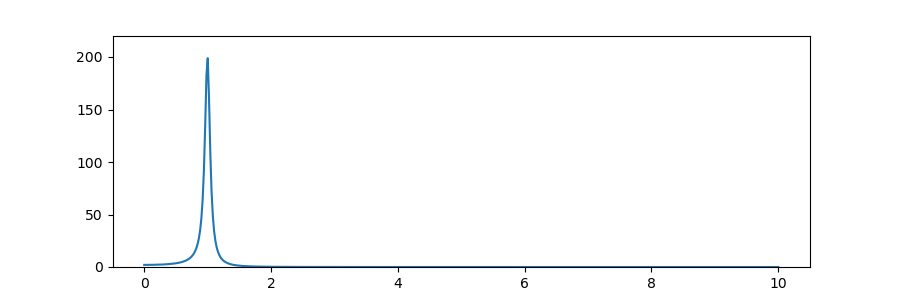

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9,3)
X = np.linspace(0,10,500)
F = np.vectorize(f)
plt.ylim(0, 220)
plt.plot(X,F(X))

Mais aproximadamente no intervalo $[0,2]$:

<IPython.core.display.Javascript object>


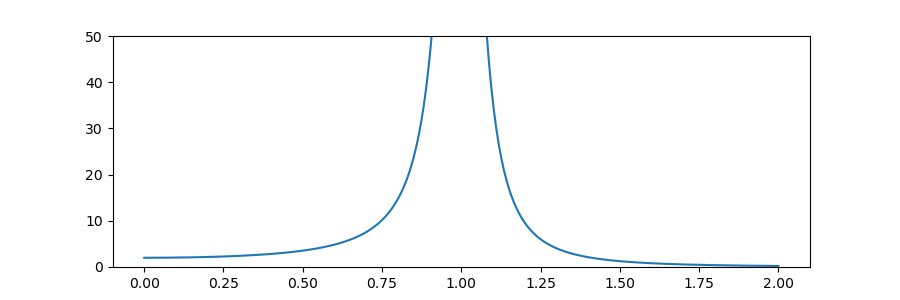

In [20]:
X = np.linspace(0,2,500)
F = np.vectorize(f)
plt.ylim(0, 50)
plt.plot(X,F(X))

#### Interpolação Polinomial:

Para $9$ pontos:

In [21]:
N = 9
X, soma = polinomial(0, 10, N)
print("Integral: ", round(soma, 6), "nos pontos ", np.round(X, 3))

Integral:  13.227748 nos pontos  [ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.  ]


Para $10$ pontos:

In [22]:
N = 10
X, soma = polinomial(0, 10, N)
print("Integral: ", round(soma, 6), "nos pontos ", np.round(X, 3))

Integral:  52.859277 nos pontos  [ 0.     1.111  2.222  3.333  4.444  5.556  6.667  7.778  8.889 10.   ]


Fazendo uma escolha de pontos que inclui o valor de pico, ou seja, quando $w=1$ no intervalo de $[0,10]$:

In [23]:
N = 21
X, soma = polinomial(0, 10, N)
print("Integral: ", round(soma, 6), "nos pontos ", np.round(X, 3))

Integral:  5534108144391547.0 nos pontos  [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


Percebemos que a solução é estranha, não converge direito, isso se deve ao comportamento gráfico da função ter um pico em $w=1$. Tentando calcular no intervalo de $[0,2]$, já que $S(w) \rightarrow 0$ para $w>2$. Teremos um comportamento diferente para as escolhas de pontos que contém $w=1$ do que aquelas que não contém esse valor. 

Para $10$ pontos:

In [24]:
N = 10
X, soma = polinomial(0, 2, N)
print("Integral: ", round(soma, 5), "nos pontos ", np.round(X, 3))

Integral:  14.10598 nos pontos  [0.    0.222 0.444 0.667 0.889 1.111 1.333 1.556 1.778 2.   ]


Para $9$ pontos, nesse caso, a escolha de pontos contempla o valor de $w=1$:

In [25]:
N = 9
X, soma = polinomial(0, 2, N)
print("Integral: ", round(soma, 5), "nos pontos ", np.round(X, 3))

Integral:  -51.10104 nos pontos  [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


Concluimos que não é possivel tirar conclusões precisas com esse método para $10$ pontos.
#### Quadratura de Gauss
Aplicando o mesmo raciocínio acima, para $9$ pontos, no intervalo de $[0,10]$:

In [26]:
N = 9
soma = quadratura(0, 10, N)
print("Integral: ", round(soma, 6), "com ", N, " pontos")

Integral:  17.055802 com  9  pontos


Para $10$ pontos:

In [27]:
N = 10
soma = quadratura(0, 10, N)
print("Integral: ", round(soma, 6), "com ", N, " pontos")

Integral:  6.59856 com  10  pontos


Mudando o intervalo da integração para $[0.2]$, ou seja, incluindo o valor de pico $w=1$, para $9$ pontos:

In [28]:
N = 9
soma = quadratura(0, 2, N)
print("Integral: ", round(soma, 6), "com ", N, " pontos")

Integral:  70.74603 com  9  pontos


Para $10$ pontos, sem o valor de pico:

In [29]:
N = 10
soma = quadratura(0, 2, N)
print("Integral: ", round(soma, 6), "com ", N, " pontos")

Integral:  15.038129 com  10  pontos


Podemos perceber que o método da Quadratura de Gauss também apresenta muitas variações nos valores numéricos calculados, sendo inconclusivo com apenas $10$ pontos.
### ii.

$$m_2 = \int_0 ^{10} w^2 S_{\sigma}(w)dw$$

In [30]:
def f(w):
    RAO = 1/np.sqrt((1-(w)**2)**2+(2*0.05*w)**2)
    S = (RAO**2)*2
    return S*w**2

Plotando o gráfico da função  $w^2 S_{\sigma} (w)$ a ser integrada:

<IPython.core.display.Javascript object>


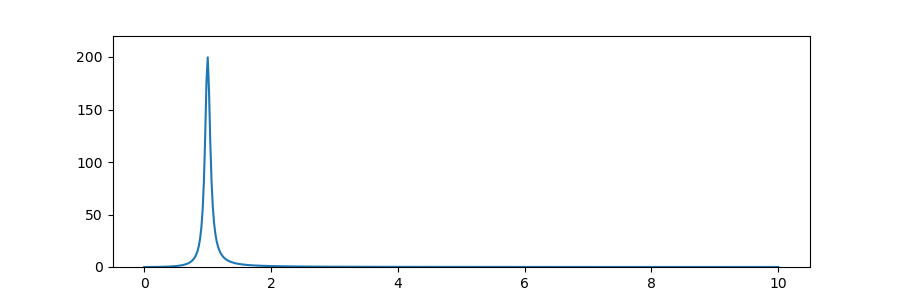

In [31]:
%matplotlib notebook
import matplotlib.pyplot as plt

X = np.linspace(0,10,500)
F = np.vectorize(f)
plt.ylim(0, 220)
plt.plot(X,F(X))

Percebemos que a função $m_2$ tem mesmo comportamento gráfico que $m_0$, com pico ainda proximo de $w=1$, com valor $200$.
#### Interpolação polinomial
Para $9$ pontos:

In [32]:
N = 9
X, soma = polinomial(0, 10, N)
print("Integral: ", round(soma, 6), "nos pontos ", np.round(X, 3))

Integral:  20.120283 nos pontos  [ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.  ]


Para $10$ pontos:

In [33]:
N = 10
X, soma = polinomial(0, 10, N)
print("Integral: ", round(soma, 5), "nos pontos ", np.round(X, 3))

Integral:  65.21002 nos pontos  [ 0.     1.111  2.222  3.333  4.444  5.556  6.667  7.778  8.889 10.   ]


Para $21$ pontos, escolha que contempla o valor de pico:

In [34]:
N = 21
X, soma = polinomial(0, 10, N)
print("Integral: ", round(soma, 5), "nos pontos ", np.round(X, 3))

Integral:  5533653799533730.0 nos pontos  [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


#### Quadratura de Gauss
Para $9$ pontos:

In [35]:
N = 9
soma = quadratura(0, 10, N)
print("Integral: ", round(soma, 6), "com ", N, " pontos")

Integral:  12.564682 com  9  pontos


Para $10$ pontos:

In [36]:
N = 10
soma = quadratura(0, 10, N)
print("Integral: ", round(soma, 6), "com ", N, " pontos")

Integral:  5.356985 com  10  pontos


A função $m_2$ também não pode ser integrada por estes métodos com $10$ pontos, devido ao comportamento gráfico da funcão.

### Exercício 4)
Agora considerando $S_{\eta}(w)= \frac{4 \pi^3 Hs ^2 }{w^5 Tz^4} exp \left ( \frac{ -16 \pi ^3}{ w^4 Tz^4} \right) $, com $Hs=3.0$ e $Tz = 5.0$, deseja-se:

### i.
$$m_0 = \int_0 ^{10} S_{\sigma}(w)dw$$

In [37]:
def f(w):
    RAO = 1/np.sqrt((1-(w)**2)**2+(2*0.05*w)**2)
    Sn = (4*(np.pi**3)*(3**2)*np.exp(-(16*np.pi**3)/(w**4*5.0**4)))/((w**5)*(5**4))
    S = (RAO**2)*Sn
    return S

Podemos perceber pela característica da função que se $w=0$, ocorre uma divisão por $0$ em $S_{\eta}$, portanto é uma indeterminação. Por este motivo, irei aproximar $w=0.00001$ para plotar a função:

<IPython.core.display.Javascript object>


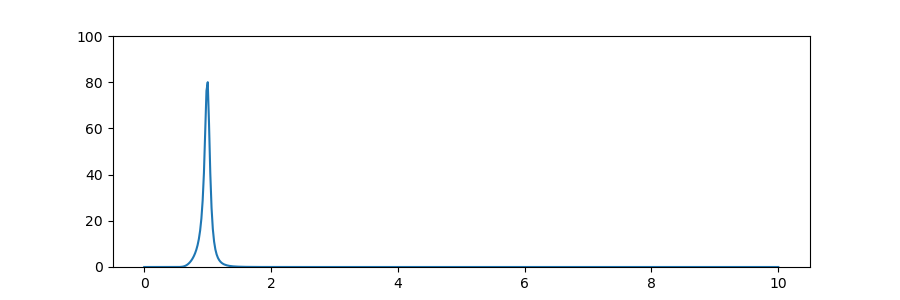

In [38]:
X = np.linspace(0.00001,10,500)
F = np.vectorize(f)
plt.ylim(0, 100)
plt.plot(X,F(X))

#### Interpolação Polinomial
A função desejada, portanto, tem comportamento semelhante à do exercício 3, contudo, agora apresenta pico com valor menor. Testando portanto, para $9$ pontos, com uma aproximação no intervalo de $[0.00000001,10]$ para não implicar em uma inderteminação no código:

In [39]:
N = 9
X, soma = polinomial(0.00000001, 10, N)
print("Integral: ", round(soma, 6), "nos pontos ", np.round(X, 4))

Integral:  2.644427 nos pontos  [ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.  ]


Para $10$ pontos:

In [40]:
N = 10
X, soma = polinomial(0.00000001, 10, N)
print("Integral: ", round(soma, 6), "nos pontos ", np.round(X, 3))

Integral:  16.337699 nos pontos  [ 0.     1.111  2.222  3.333  4.444  5.556  6.667  7.778  8.889 10.   ]


Testando no intervalo de $[0,2]$, para $9$ pontos:

In [41]:
N = 9
X, soma = polinomial(0.00000001, 2, N)
print("Integral: ", round(soma, 5), "nos pontos ", np.round(X, 3))

Integral:  -22.61679 nos pontos  [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


Para $10$ pontos:

In [42]:
N = 10
X, soma = polinomial(0.00000001, 2, N)
print("Integral: ", round(soma, 5), "nos pontos ", np.round(X, 3))

Integral:  4.01428 nos pontos  [0.    0.222 0.444 0.667 0.889 1.111 1.333 1.556 1.778 2.   ]


Percebemos que o método não converge para $10$ pontos com esta função.

#### Quadratura de Gauss
Como os pontos são tabelados nesse método e não incluem os extremos, temos que é possivel utilizar a função com intervalo $[0,10]$ mesmo.
Fazendo a integração numérica para $9$ pontos:

In [43]:
N = 9
soma = quadratura(0, 10, N)
print("Integral: ", round(soma, 6), "com ", N, " pontos")

Integral:  6.591567 com  9  pontos


Para $10$ pontos:

In [44]:
N = 10
soma = quadratura(0, 10, N)
print("Integral: ", round(soma, 6), "com ", N, " pontos")

Integral:  0.75329 com  10  pontos


A integração da função dada continua inconclusiva para esse método utilizando $10$ pontos, apresentando variação muito grande, dependendo dos pontos de integração escolhidos. Isso se deve a características gráficas da função do exercicío.
### Exercício 5)

$$ f(x) = 2 + 2x - x^2 +3x^3$$

$$A = \int_0 ^4 f(x)dx$$

#### Integração Polinomial

Para a função $f(x)$ de ordem $n$, o número mínimo de pontos de integração $N$, deve ser $n+1$. Como a ordem é $3$, devemos utilizar $4$ pontos para integração numérica.

In [45]:
def f(x):
    return 2+ 2*x - x**2 + 3*x**3

In [46]:
N = 4
X, soma = polinomial(0, 4, N)
print("Integral: ", round(soma, 6), "nos pontos ", np.round(X, 4))

Integral:  194.666667 nos pontos  [0.     1.3333 2.6667 4.    ]


#### Quadratura de Gauss

Para a função $f(x)$ de ordem $n$, o número mínimo de pontos de integração $N$, deve ser $\geq \frac{n+1}{2}$. Como a ordem da função é $3$, temos que $N \geq\frac{3+1}{2}$, devemos utilizar $2$ pontos para integração numérica.

In [47]:
N = 2
soma = quadratura(0, 4, N)
print("Integral: ", round(soma, 6), "com ", N, " pontos")

Integral:  194.666667 com  2  pontos


Concluindo que conseguimos o mesmo resultado, com a metade do n$^o$ de pontos, isso porque a função é polinomial, então é mais simples de ajustar.

### Exercício 6)
$$ A= \int_0 ^3 \frac{1}{1+x^2} dx $$

Estimando os valores pela regra do Ponto do Meio, do Trapézio e pelo Regra de Simpson.

In [48]:
def f(x):
    return 1/(1+x**2)

In [49]:
def estimativa(a, b):
    m = (b-a)/2
    M = f(m)*(b-a)
    T = (f(a) + f(b))*(b-a)/2
    S = ((b-a)/6)*(f(a) + (4*f(m)) + f(b))
    E = (T-M)/3

    M_estimado = M + E
    T_estimado = T - 2*E

    print("Regra do ponto do meio:", round(M, 5),
          "  Estimado após erro:", round(M_estimado, 5))
    print("Regra do Trapézio:     ", round(T, 5),
          "     Estimado após erro:", round(T_estimado, 5))
    print("Regra de Simpson mesmo:", round(S, 5))

In [50]:
estimativa(0, 3)

Regra do ponto do meio: 0.92308   Estimado após erro: 1.16538
Regra do Trapézio:      1.65      Estimado após erro: 1.16538
Regra de Simpson mesmo: 1.16538


#### Integração Polinomial

Utilizando $10$ pontos para um valor mais próximo ao real:

In [51]:
N = 10
X, soma = polinomial(0, 3, N)
print("Integral: ", round(soma, 6), "nos pontos ", np.round(X, 3))

Integral:  1.249416 nos pontos  [0.    0.333 0.667 1.    1.333 1.667 2.    2.333 2.667 3.   ]


#### Quadratura de Gauss
Utilizando $6$ pontos:

In [52]:
N = 6
soma = quadratura(0, 3, N)
print("Integral: ", round(soma, 6), "com ", N, " pontos")

Integral:  1.249091 com  6  pontos


Obtemos então, valores proximos para os casos de quadratura de gauss e interpolação polinomial, considerando os valores estimados anteriormente, a regra de Simpson é a que mais se aproxima do valor exato. 

### Exercício 7) i.
$$ A_1 = \int_{- \infty}^1 \frac{1}{ \sqrt{2 \dot \pi}} e ^{\left( - \frac{x^2}{2} \right)} dx $$

Para integrais com integração no intervalo $[-\infty, \infty]$, utilizamos diferentes pesos e pontos com o método de Gauss-Hermite, que calcula uma integral do tipo:
$$\int_{\infty}^{\infty} e^{−x^2}f(x)dx.
$$

In [54]:
def peso_hermite(N):
    if N == 1:
        w = np.array([0.0])
        x = np.array([1.7724538509055160272981674833411])
    elif N == 2:
        w = np.array(
            [0.8862269254527580136491, 0.8862269254527580136491])
        x = np.array([-0.7071067811865475244008, 0.7071067811865475244008])
    elif N == 3:
        w = np.array([0.295408975150919337883, 1.181635900603677351532, 0.295408975150919337883])
        x = np.array([-1.224744871391589049099, 0.0, 1.224744871391589049099])
    elif N == 4:
        w = np.array([0.081312835447245177143, 0.8049140900055128365061, 0.8049140900055128365061,
                      0.08131283544724517714303])
        x = np.array([-1.650680123885784555883, -0.5246476232752903178841, 0.5246476232752903178841,
                      1.650680123885784555883])
    elif N == 5:
        w = np.array([0.01995324205904591320774, 0.3936193231522411598285,0.9453087204829418812257,
                      0.393619323152241159828, 0.01995324205904591320774])
        x = np.array([-2.020182870456085632929, -0.9585724646138185071128, 0.0, 0.9585724646138185071128,
                      2.020182870456085632929])
    elif N == 6:
        w = np.array([0.004530009905508845640857, 0.1570673203228566439163, 0.7246295952243925240919,
                      0.724629595224392524092, 0.1570673203228566439163, 0.004530009905508845640857])
        x = np.array([-2.350604973674492222834, -1.335849074013696949715, -0.4360774119276165086792,
                      0.436077411927616508679, 1.335849074013696949715, 2.350604973674492222834])
    elif N == 7:
        w = np.array([9.71781245099519154149e-4, 0.05451558281912703059218, 0.4256072526101278005203,
                      0.810264617556807326765,0.4256072526101278005203, 0.0545155828191270305922,
                      9.71781245099519154149e-4])
        x = np.array([-2.651961356835233492447, -1.673551628767471445032, -0.8162878828589646630387, 0.0,
                      0.8162878828589646630387, 1.673551628767471445032, 2.651961356835233492447])
    elif N == 8:
        w = np.array([1.99604072211367619206E-4, 0.0170779830074134754562, 0.2078023258148918795433,
                      0.6611470125582412910304,0.6611470125582412910304, 0.2078023258148918795433,
                      0.0170779830074134754562, 1.996040722113676192061E-4])
        x = np.array([-2.930637420257244019224, -1.981656756695842925855, -1.157193712446780194721,
                      -0.3811869902073221168547, 0.3811869902073221168547, 1.157193712446780194721,
                      1.981656756695842925855, 2.930637420257244019224])
    elif N == 9:
        w = np.array([3.960697726326438190459E-5, 0.00494362427553694721722, 0.088474527394376573288,
                      0.4326515590025557501998, 0.7202352156060509571243, 0.4326515590025557502,
                      0.088474527394376573288, 0.004943624275536947217225, 3.96069772632643819046E-5])
        x = np.array([-3.19099320178152760723, -2.266580584531843111802, -1.468553289216667931667,
                      -0.7235510187528375733226,0.0, 0.7235510187528375733226, 1.468553289216667931667,
                      2.266580584531843111802, 3.19099320178152760723])
    elif N == 10:
        w = np.array([7.64043285523262062916E-6, 0.001343645746781, 0.03387439445548,
                      0.2401386110823146864165,0.61086263373257987836, 0.6108263373532, 0.24013861108,
                      0.033874394455481, 0.00134364574812326, 7.64043285523262062916E-6])
        x = np.array([-3.436159118837737603327, -2.532731674232789796409, -1.756683649299881773451,
                      -1.036610829789513654178,-0.3429013272237046087892, 0.3429013272237046087892,
                      1.036610829789513654178, 1.756683649299881773451, 2.532731674232789796409,
                      3.436159118837737603327])
    else:
        w = np.zeros(N)
        x = np.ones(N)
    return w, x

In [55]:
def hermite(N):
    w, x = peso_hermite(N)
    soma = 0
    for i in np.arange(N):
        soma += f(x[i])*w[i]
    return soma

Para ajustar o método à função dada, é necessário fazer uma mudança de variaveis, $u^2 = \frac{x^2}{2}$. Logo temos que, $x = \sqrt{2}u$, $dx = \sqrt{2} du$. Agora nossa função passa a ser:

$$ A_1 = \int_{- \infty}^{\frac{\sqrt{2}}{2}} \frac{\sqrt{2}}{ \sqrt{2 \dot \pi}} e ^{\left( - u^2 \right)} du $$

Definindo a função $f(x)$ considerando a mudança de variável feita, e excluindo a parte $e^{-x^2}$ da integral, temos:

$$f(x)= \frac{\sqrt{2}}{ \sqrt{2 \dot \pi}}$$

In [56]:
def f(x):
    y = np.sqrt(2)/(np.sqrt(2*np.pi))
    return y

Para $2$ pontos:

In [58]:
N=2
soma = hermite(N)
print("Integral: ", soma, "para ", N, " pontos")

Integral:  1.0000000000000002 para  2  pontos


Para $10$ pontos:

In [59]:
N=10
soma = hermite(N)
print("Integral: ", round(soma,8), "para ", N, " pontos")

Integral:  0.99997952 para  10  pontos


Observando os limites de integração, temos que esse método apenas calcula a integral numericamente no intervalo de $[- \infty, \infty ]$. Portanto, é necessário fazer o calculo pela quadratura de gauss entre $\left[ 0,\frac{\sqrt{2}}{2}\right]$ incluindo a parte exponencial, para então somar à metade do valor encontrado para Gauss-Hermite, já que $f(x)$ é constante:

In [60]:
def f(x):
    y = np.exp(-x**2)*np.sqrt(2)/(np.sqrt(2*np.pi))
    return y

Utilizando os valores encontrados em Gauss Hermite, para $2$ pontos:

In [61]:
a=0
b= np.sqrt(2)/2
integral = 1/2 + quadratura(a,b, 2)
print("Integral após ajuste: ", round(integral, 8))

Integral após ajuste:  0.84122114


Para $10$ pontos:

In [62]:
a=0
b= np.sqrt(2)/2
integral = 0.99997952/2 + quadratura(a,b, 10)
print("Integral após ajuste: ", round(integral, 8))

Integral após ajuste:  0.84133451


### ii.
$$ A_2 = \int_{- \infty}^{\infty} \frac{x^2}{ \sqrt{2 \dot \pi}} e ^{\left( - \frac{x^2}{2} \right)} dx $$


Para ajustar o método à função dada, é necessário fazer uma mudança de variaveis, utilizarei a mesma mudança do tópico anterior. Agora nossa função passa a ser:

$$ A_2 = \int_{- \infty}^{\infty} \frac{2 \sqrt{2} u^2}{ \sqrt{2 \dot \pi}} e ^{\left( - u^2 \right)} du $$

Definindo a função $f(x)$ considerando a mudança de variável feita, e excluindo a parte $e^{-x^2}$ da integral, temos:

$$f(x)= \frac{2 \sqrt{2} x^2}{ \sqrt{2 \dot \pi}}$$

In [63]:
def f(x):
    return 2*np.sqrt(2)*(x**2)/np.sqrt(2*np.pi)

Para $2$ pontos:

In [65]:
N=2
soma = hermite(N)
print("Integral: ", soma, "para ", N, " pontos")

Integral:  1.0000000000000004 para  2  pontos


Para $10$ pontos:

In [66]:
N=10
soma = hermite(N)
print("Integral: ",soma, "para ", N, " pontos")

Integral:  0.9999951843364122 para  10  pontos
